# Causal DAG: Gender Wage Gap

This notebook constructs and visualizes a Directed Acyclic Graph (DAG) to model the causal relationships affecting the Gender Wage Gap.

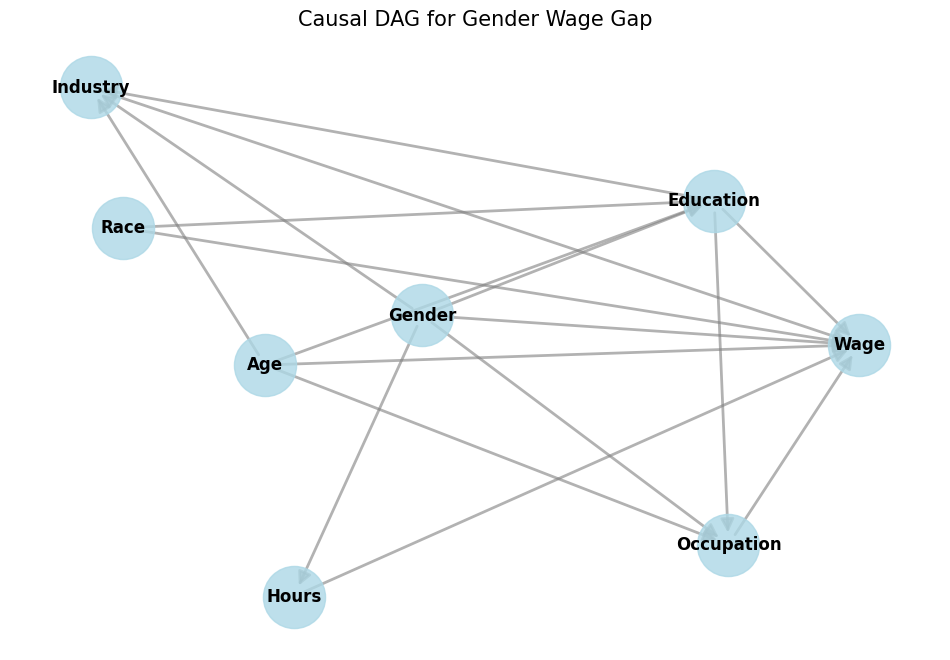

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the DAG
G = nx.DiGraph()

# Define Nodes
nodes = [
    'Gender',      # Treatment
    'Wage',        # Outcome
    'Age',         # Confounder
    'Race',        # Confounder
    'Education',   # Mediator
    'Industry',    # Mediator
    'Occupation',  # Mediator
    'Hours'        # Mediator/Confounder
]

G.add_nodes_from(nodes)

# Define Edges (Causal Links)
edges = [
    # Confounders affecting Treatment and Outcome (or Mediators)
    ('Age', 'Wage'),
    ('Age', 'Education'),
    ('Age', 'Industry'),
    ('Age', 'Occupation'),
    ('Race', 'Wage'),
    ('Race', 'Education'),
    
    # Treatment affecting Mediators and Outcome
    ('Gender', 'Education'),
    ('Gender', 'Industry'),
    ('Gender', 'Occupation'),
    ('Gender', 'Hours'),
    ('Gender', 'Wage'), # Direct Effect
    
    # Mediators affecting Outcome
    ('Education', 'Wage'),
    ('Education', 'Industry'), # Education affects Industry choice
    ('Education', 'Occupation'),
    ('Industry', 'Wage'),
    ('Occupation', 'Wage'),
    ('Hours', 'Wage')
]

G.add_edges_from(edges)

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=1.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray', arrowsize=20)

plt.title("Causal DAG for Gender Wage Gap", fontsize=15)
plt.axis('off')
plt.show()

## Identification Strategy

### 1. Total Effect of Gender on Wage
To estimate the **total effect** (including pathways through education, industry, etc.), we must control for **confounders** (variables that affect both Gender and Wage, or are ancestors of both). 

In this simplified DAG:
- `Age` and `Race` are potential confounders (though Gender is biologically assigned, in social science data, sampling bias or cohort effects might make Age/Race relevant controls, or we treat them as pre-treatment covariates).
- We do **NOT** control for mediators (`Education`, `Industry`, `Occupation`) if we want the total effect.

**Adjustment Set**: `{Age, Race}`

### 2. Direct Effect of Gender on Wage
To estimate the **direct effect** (wage discrimination within same job/education), we must control for **mediators** as well.

**Adjustment Set**: `{Age, Race, Education, Industry, Occupation, Hours}`